In [20]:

import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Define the symbol for Nvidia, Intel, and AMD
symbol = 'SOXX'

# Calculate the end date as today and the start date as 10 years before
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * 10)

try:
    # Fetch historical stock data
    stock_data = yf.download(symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))['Adj Close']

    # Create a DataFrame for the portfolio
    portfolio_df = pd.DataFrame(stock_data, columns=['Adj Close'])

    # Add a column for the number of shares (1000 shares for SOXX)
    portfolio_df['Shares_SOXX'] = 1000

    # Calculate the value of the portfolio in USD
    portfolio_df['Portfolio_Value'] = portfolio_df['Adj Close'] * portfolio_df['Shares_SOXX']

    # Round the portfolio value columns to 2 decimal places
    portfolio_df = portfolio_df.round({'Adj Close': 2, 'Portfolio_Value': 2})

    # Print the first and last few rows of the portfolio DataFrame
    print(portfolio_df.head())
    print(portfolio_df.tail())
except Exception as e:
    print(f"Failed to fetch stock data: {e}")



[*********************100%%**********************]  1 of 1 completed

            Adj Close  Shares_SOXX  Portfolio_Value
Date                                               
2014-03-31      18.72         1000         18719.20
2014-04-01      19.02         1000         19017.52
2014-04-02      18.99         1000         18989.33
2014-04-03      19.02         1000         19017.52
2014-04-04      18.48         1000         18479.60
            Adj Close  Shares_SOXX  Portfolio_Value
Date                                               
2024-03-21     225.18         1000        225179.99
2024-03-22     225.45         1000        225450.00
2024-03-25     224.57         1000        224570.01
2024-03-26     222.88         1000        222880.00
2024-03-27     225.68         1000        225679.99


[*********************100%%**********************]  1 of 1 completed


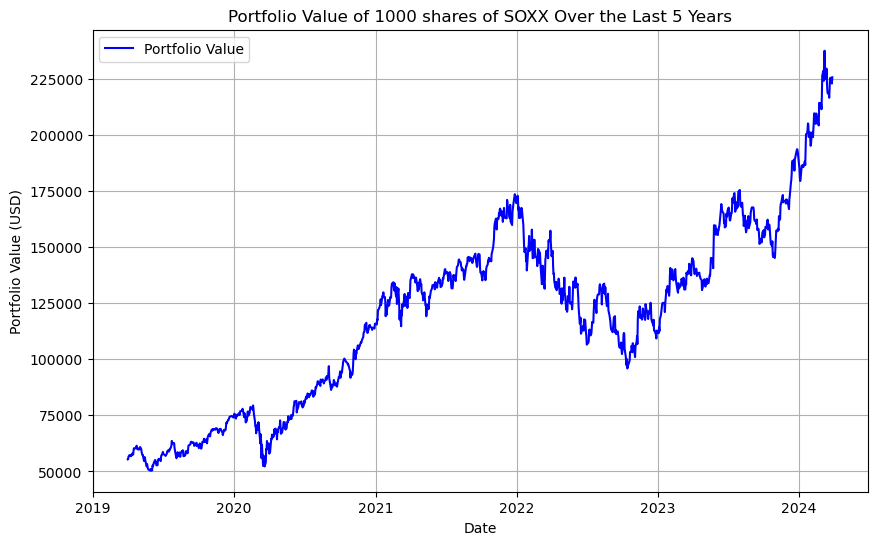

In [21]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Symbols for SOXX
symbol = 'SOXX'

# Calculate the start and end dates for the past 5 years
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * 5)

# Fetch historical stock data for SOXX
stock_data = yf.download(symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))['Adj Close']

# Create a DataFrame for the SOXX portfolio
portfolio_df = pd.DataFrame(stock_data).rename(columns={'Adj Close': symbol})

# Assume 1000 shares of SOXX
shares_soxx = 1000

# Calculate the value of the SOXX portfolio in USD
portfolio_df['Portfolio_Value'] = portfolio_df[symbol] * shares_soxx

# Round the portfolio value to 2 decimal places
portfolio_df = portfolio_df.round({symbol: 2, 'Portfolio_Value': 2})

# Plot the portfolio value over the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Portfolio_Value'], label='Portfolio Value', color='blue')
plt.title(f'Portfolio Value of 1000 shares of {symbol} Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.legend()
plt.grid(True)
plt.show()


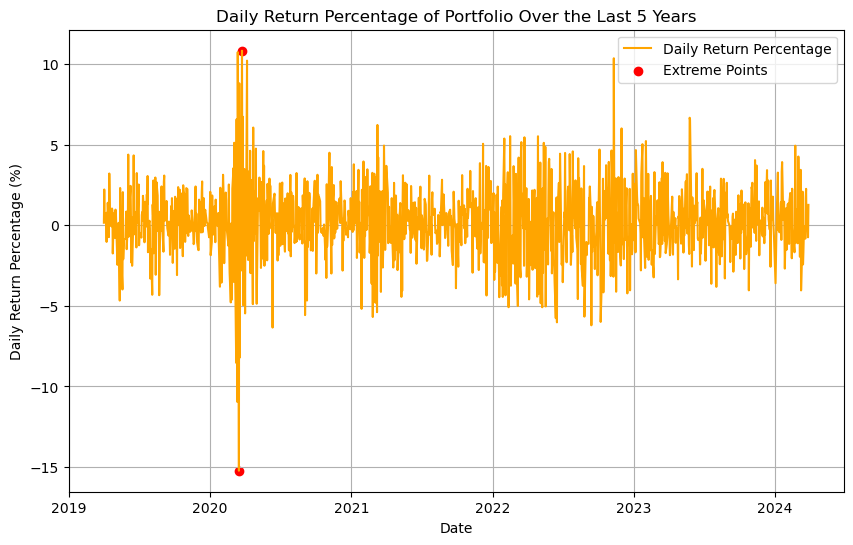

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Assuming the earlier steps are correct and portfolio_df has been correctly initialized and populated

# Ensure the DataFrame does not contain NaN values that could disrupt calculations or plotting
portfolio_df.dropna(inplace=True)

# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Plot the daily return percentage for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Daily_Return_Percentage'], label='Daily Return Percentage', color='orange')
plt.title('Daily Return Percentage of Portfolio Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage (%)')
plt.legend()
plt.grid(True)

# Mark the day with the highest and lowest return
max_return_day = portfolio_df['Daily_Return_Percentage'].idxmax()
min_return_day = portfolio_df['Daily_Return_Percentage'].idxmin()
plt.scatter([max_return_day, min_return_day], 
            [portfolio_df.loc[max_return_day, 'Daily_Return_Percentage'], portfolio_df.loc[min_return_day, 'Daily_Return_Percentage']], 
            color='red', label='Extreme Points')

plt.legend()
plt.show()


In [24]:
# Calculate daily percentage change in portfolio value and add it as a new column
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Print the first few rows of the portfolio DataFrame
portfolio_df


,SOXX,Portfolio_Value,Daily_Return_Percentage
Date,,,
2019-04-01,55.36,55356.39,NaN
2019-04-02,55.44,55439.02,0.149269
2019-04-03,56.66,56664.28,2.210104
2019-04-04,56.79,56786.81,0.216239
2019-04-05,57.20,57197.14,0.722580
...,...,...,...
2024-03-21,225.18,225179.99,2.249962
2024-03-22,225.45,225450.00,0.119909
2024-03-25,224.57,224570.01,-0.390326


In [25]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define the symbol for SOXX
symbol = 'SOXX'

# Calculate the end date as today and the start date as 5 years before the end date
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

# Fetch historical stock data for SOXX
stock_data = yf.download(symbol, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame for SOXX
soxx_df = pd.DataFrame(stock_data).rename(columns={'Adj Close': symbol})

# Assume 1000 shares of SOXX
soxx_df['Shares_SOXX'] = 1000

# Calculate the value of the SOXX holding in USD
soxx_df['Portfolio_Value'] = soxx_df[symbol] * soxx_df['Shares_SOXX']

# Calculate daily percentage change in portfolio value
soxx_df['Daily_Return_Percentage'] = soxx_df['Portfolio_Value'].pct_change() * 100

# Feature Extraction
# Lagged values of daily return percentage
soxx_df['Previous_Return'] = soxx_df['Daily_Return_Percentage'].shift(1)

# Rolling statistics of daily return percentage
soxx_df['Rolling_Mean'] = soxx_df['Daily_Return_Percentage'].rolling(window=7).mean()
soxx_df['Rolling_Std'] = soxx_df['Daily_Return_Percentage'].rolling(window=7).std()

# Drop NaN values resulting from rolling calculations and lagged values
soxx_df.dropna(inplace=True)

# Prepare data for machine learning
X = soxx_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y = soxx_df['Daily_Return_Percentage']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Predict future daily return percentages for the next 30 days
last_features = X.tail(1)
next_30_days = pd.date_range(start=soxx_df.index[-1], periods=30, freq='D')
future_features = pd.DataFrame(index=next_30_days, columns=X.columns)
future_features.iloc[0] = last_features.values[0]

for i in range(1, 30):
    # Here we simulate future 'Rolling_Mean' and 'Rolling_Std' features with random values.
    # This is a simplification and may not reflect real-world future conditions.
    future_features.iloc[i] = np.concatenate(([future_features.iloc[i - 1][0]], np.random.rand(2)))

future_predictions = model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(future_predictions)


[*********************100%%**********************]  1 of 1 completed

Mean Absolute Error: 1.547716151676475
Future Predictions for the next 30 days:
[ 0.7505295   0.22554281  0.18903626  0.67844312  1.08407749  0.17073911
  0.54084557  0.94267577  0.75302871  1.02849746  0.82809578  0.82458208
  0.1486921   1.15261439  1.19840497  0.88311774  0.70082006  0.4029436
  1.24799314  1.23296531  0.46519559  1.10471582  1.27485918  0.62521465
  0.29677735  0.24912945  0.12956606  0.68569038  0.72593993 -0.05768184]


In [26]:
portfolio_df 

,SOXX,Portfolio_Value,Daily_Return_Percentage
Date,,,
2019-04-01,55.36,55356.39,NaN
2019-04-02,55.44,55439.02,0.149269
2019-04-03,56.66,56664.28,2.210104
2019-04-04,56.79,56786.81,0.216239
2019-04-05,57.20,57197.14,0.722580
...,...,...,...
2024-03-21,225.18,225179.99,2.249962
2024-03-22,225.45,225450.00,0.119909
2024-03-25,224.57,224570.01,-0.390326


In [29]:
portfolio_df.columns

Index(['SOXX', 'Portfolio_Value', 'Daily_Return_Percentage'], dtype='object')